In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def read_fasta(fp):
    name, seq = None, []
    for line in fp:
        line = line.rstrip()
        if line.startswith(">"):
            if name: yield (name, ''.join(seq))
            name, seq = line, []
        else:
            seq.append(line)
    if name: yield (name, ''.join(seq))

def parse(seq):
    nucleotides = {'A': 0, 'T': 0, 'C': 0, 'G': 0}
    for char in seq:
        nucleotides[char] += 1
    return nucleotides

def parse_twentymer(seq):
    # {20-mer : count}
    dict = {} 
    unique = 0
    print("number of 20-mers: " + str(len(seq) - 20 + 1))

    for i in range(len(seq) - 20 + 1):
        twentymer = seq[i:i+20]
        if twentymer in dict: 
            dict[twentymer] += 1
            if (dict[twentymer] == 2): unique -=1
        else: 
            dict[twentymer] = 1
            unique += 1
    print("number of unique 20-mers " + str(unique))
    
    

In [7]:
def plot_part_c(length):
    plt.hist(length, bins = 100)
    print("Max length: " + str(max(length)))
    plt.title("Gene Length")
    plt.ylabel("Frequency")
    plt.xlabel("Length")
    plt.savefig("3c.png")
    plt.show()

Max length: 7152


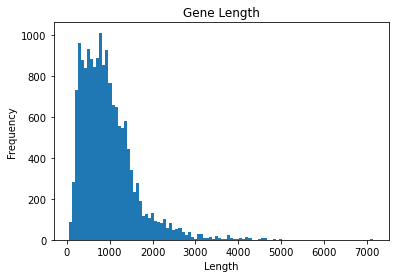

Number of genes: 16868
Number of genes transcribed in reverse direction: 8796


In [8]:
# Problem 3c:
with open('problem_set_data/ecoli_genes.txt') as f:
    lines = f.readlines() # list containing lines of file
    d = {} # {gene name: [start, end, orientation]}
    length = []
    reverse = 0

    i = 1
    for line in lines:
        line = line.strip() # remove leading/trailing white spaces
        if line:
            if i == 1:
                i = i + 1
            else:
                data = [item.strip() for item in line.split(',')]
                for index, elem in enumerate(data):
                    d[data[0]] = data[1:]
                    length.append(int(data[2]) - int(data[1]) + 1)
                    if (data[3] == 'reverse'): reverse += 1

    plot_part_c(length)

    print("Number of genes: " + str(len(length)))
    print("Number of genes transcribed in reverse direction: " + str(reverse))

In [25]:
stop_codon = "*"

standard_RNA_codon_table = {
        'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
        'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
        'UAU': 'Y', 'UAC': 'Y', 'UAA': '*', 'UAG': '*',
        'UGU': 'C', 'UGC': 'C', 'UGA': '*', 'UGG': 'W',
        'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
        'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
        'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
        'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
        'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M',
        'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
        'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
        'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
        'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
        'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
        'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
        'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
    }

def check_one_mutation(s1, s2):
    count = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            count += 1
    return count == 1

def part_d(sequence):
    synonymous_mutations = 0
    nonsense_mutations = 0
    missense_mutations = 0
    
    # loop through all codons in sequence
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        
        if codon in standard_RNA_codon_table:
            amino_acid = standard_RNA_codon_table[codon]
            
            for check_codon in standard_RNA_codon_table:
                # check for codons that result from a single mutation
                if check_one_mutation(check_codon, codon):
                    # check for mutations that don't change amino acid
                    if standard_RNA_codon_table[check_codon] == amino_acid:
                        synonymous_mutations += 1
                    # check for mutations that change amino acid
                    else:
                        # changes amino acid to a stop codon
                        if standard_RNA_codon_table[check_codon] == stop_codon:
                            nonsense_mutations += 1
                        # change amino acid without introducing stop codon
                        else: 
                            missense_mutations += 1
    
    print("number of synonymous mutations: " + str(synonymous_mutations))
    print("number of nonsense mutations: " + str(nonsense_mutations))
    print("number of missense mutations: " + str(missense_mutations))


In [27]:
# problem 3a, 3b, 3c

with open('problem_set_data/ecoli_reference_genome.fasta') as fp:
    for name, seq in read_fasta(fp):
        # Problem 3a: 
        print(parse(seq))
        # Problem 3b
        parse_twentymer(seq)
        # Problem 3d
        part_d(seq)

{'A': 1140788, 'T': 1138496, 'C': 1176949, 'G': 1173579}
number of 20-mers: 4629793
number of unique 20-mers 4510555
number of synonymous mutations: 1573990
number of nonsense mutations: 219964
number of missense mutations: 4408441
